In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import joblib 

import os
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from PIL import Image
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

def analyze_images(root_dir):
    """Analyzes images in subdirectories and returns a DataFrame."""

    data = []
    for split in ['train', 'test']:
        split_dir = os.path.join(root_dir, split)
        for emotion in os.listdir(split_dir):
            emotion_dir = os.path.join(split_dir, emotion)
            for image_file in os.listdir(emotion_dir):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if it's an image
                    image_path = os.path.join(emotion_dir, image_file)
                    try:
                        img = cv2.imread(image_path)
                        if img is None:
                            print(f"Warning: Could not read image {image_path}")
                            continue  # Skip to the next image if reading fails
                        height, width, channels = img.shape
                        size = (width, height)
                        aspect_ratio = width / height
                        is_grayscale = (channels == 1)
                        mean_pixel_value = np.mean(img) #Mean pixel value
                        std_pixel_value = np.std(img) #Standard deviation of pixel values
                        min_pixel_value = np.min(img)
                        max_pixel_value = np.max(img)
                        data.append({
                            'split': split,
                            'emotion': emotion,
                            'file_name': image_file,
                            'size': size,
                            'aspect_ratio': aspect_ratio,
                            'channels': channels,
                            'is_grayscale': is_grayscale,
                            'mean_pixel_value': mean_pixel_value,
                            'std_pixel_value': std_pixel_value,
                            'min_pixel_value': min_pixel_value,
                            'max_pixel_value': max_pixel_value,
                        })
                    except Exception as e:
                        print(f"Error processing {image_path}: {e}")

    return pd.DataFrame(data)

# Example usage (replace with your root directory)
root_directory = './dataset_emociones'  # Assuming the script is in the same directory as 'train' and 'test'
df = analyze_images(root_directory)

# Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15339 entries, 0 to 15338
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   split             15339 non-null  object 
 1   emotion           15339 non-null  object 
 2   file_name         15339 non-null  object 
 3   size              15339 non-null  object 
 4   aspect_ratio      15339 non-null  float64
 5   channels          15339 non-null  int64  
 6   is_grayscale      15339 non-null  bool   
 7   mean_pixel_value  15339 non-null  float64
 8   std_pixel_value   15339 non-null  float64
 9   min_pixel_value   15339 non-null  uint8  
 10  max_pixel_value   15339 non-null  uint8  
dtypes: bool(1), float64(3), int64(1), object(4), uint8(2)
memory usage: 1003.8+ KB


In [9]:
df.describe()

,aspect_ratio,channels,mean_pixel_value,std_pixel_value,min_pixel_value,max_pixel_value
count,15339.0,15339.0,15339.000000,15339.000000,15339.000000,15339.000000
mean,1.0,3.0,121.213288,55.114700,2.365734,243.348328
std,0.0,0.0,34.293184,13.668618,8.139129,23.073971
min,1.0,3.0,11.897433,6.621224,0.000000,40.000000
25%,1.0,3.0,97.069767,45.554805,0.000000,242.000000
50%,1.0,3.0,121.150100,54.455721,0.000000,255.000000
75%,1.0,3.0,145.483067,64.035642,0.000000,255.000000
max,1.0,3.0,236.206300,113.259548,169.000000,255.000000


In [10]:
df.head()

,split,emotion,file_name,size,aspect_ratio,channels,is_grayscale,mean_pixel_value,std_pixel_value,min_pixel_value,max_pixel_value
0,train,alegria,train_00003_aligned.jpg,"(100, 100)",1.0,3,False,152.753333,83.768101,0,255
1,train,alegria,train_00004_aligned.jpg,"(100, 100)",1.0,3,False,173.105500,76.814304,0,255
2,train,alegria,train_00008_aligned.jpg,"(100, 100)",1.0,3,False,121.993400,60.041547,3,255
3,train,alegria,train_00009_aligned.jpg,"(100, 100)",1.0,3,False,98.030200,45.078688,0,247
4,train,alegria,train_00011_aligned.jpg,"(100, 100)",1.0,3,False,73.018367,48.698960,0,255


In [14]:
print(df['size'].unique())
print(df['channels'].unique())
print(df['aspect_ratio'].unique())

[(100, 100)]
[3]
[1.]


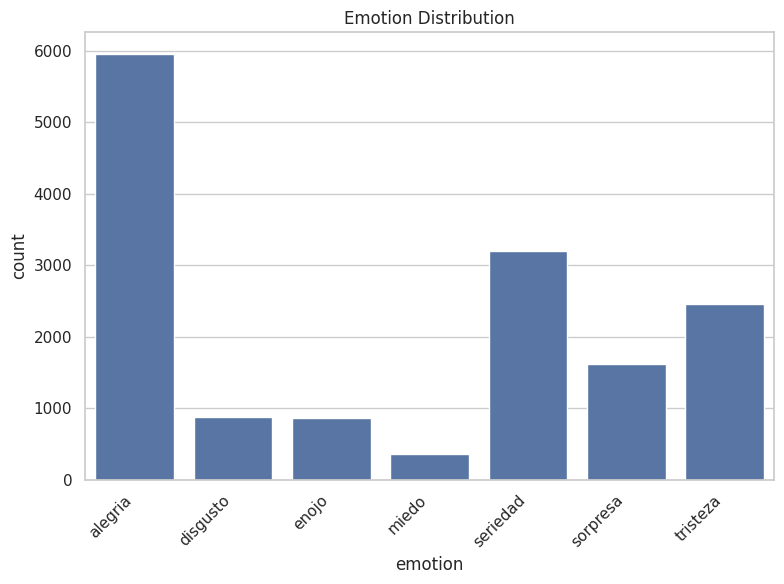

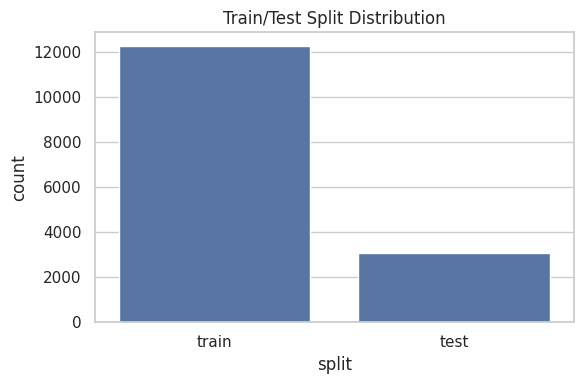

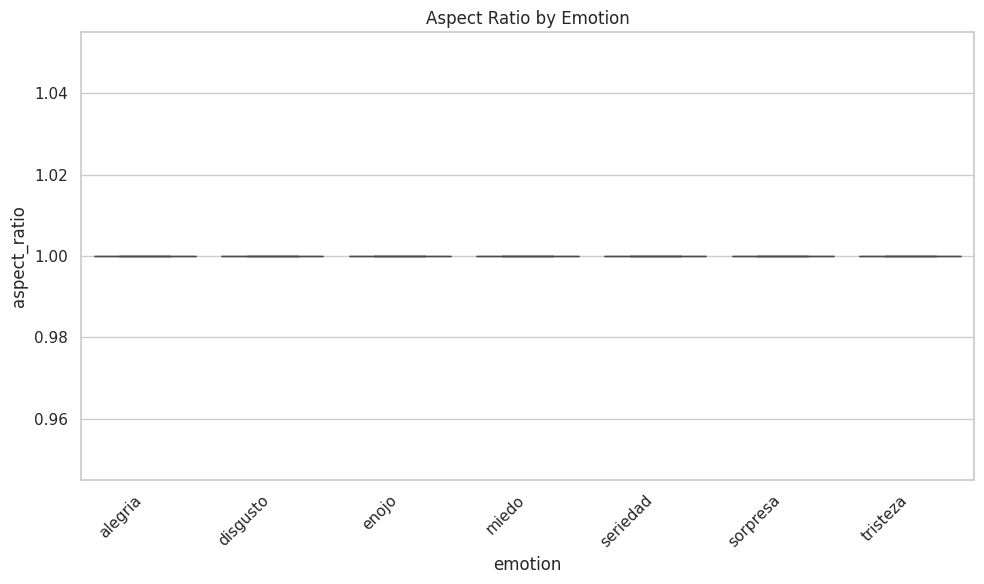

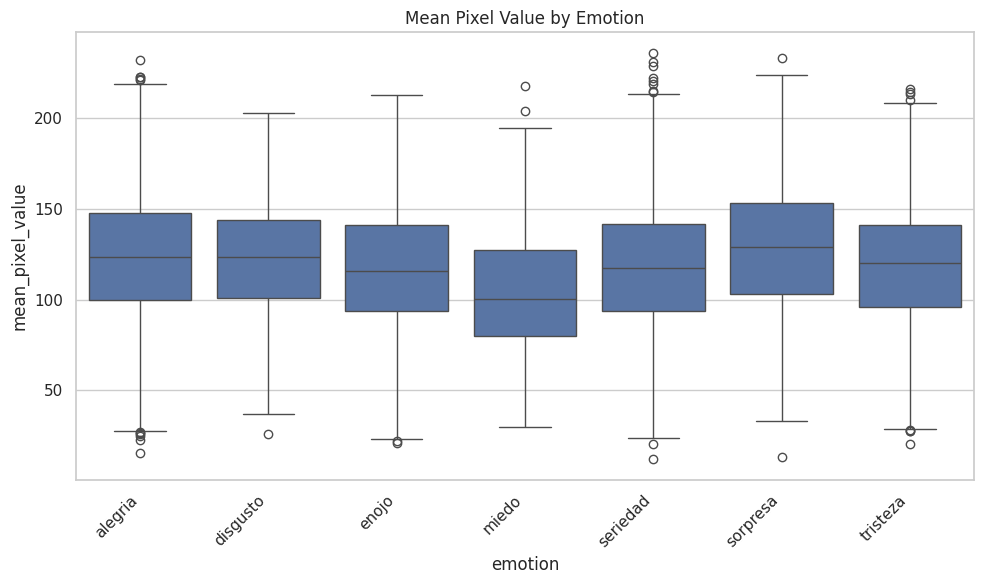

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data_analysis(df):
    """Plots data analysis using Seaborn."""

    sns.set(style="whitegrid")  # Set Seaborn style

    plt.figure(figsize=(8, 6))
    sns.countplot(x='emotion', data=df)
    plt.title('Emotion Distribution')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.countplot(x='split', data=df)
    plt.title('Train/Test Split Distribution')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='emotion', y='aspect_ratio', data=df)
    plt.title('Aspect Ratio by Emotion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='emotion', y='mean_pixel_value', data=df)
    plt.title('Mean Pixel Value by Emotion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    plt.show()

# Assuming 'df' is your DataFrame from the previous code
plot_data_analysis(df)

# Classification



In [2]:
class NnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, nnet_builder, epochs=100, lr=0.1):
        super(NnClassifier, self).__init__()
        self.device=device
        self.epochs = epochs
        self.lr = lr
        self.nnet_builder = nnet_builder

    def feed_model(self, X):
        return self.model(X)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)

        self.nnet = self.nnet_builder.build()

        self.model = self.nnet.to(self.device)

        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.CrossEntropyLoss()

        self.model.train()
        for epoch in range(self.epochs):
            optimizer.zero_grad()
            output = self.feed_model(X_tensor)
            loss = criterion(output, y_tensor)
            loss.backward()
            optimizer.step()

        self.is_fitted_ = True
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.feed_model(X_tensor)
            predictions = torch.argmax(outputs, dim=1)
        # del X_tensor
        return predictions.cpu().numpy()

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.feed_model(X_tensor)
            probabilities = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
        return probabilities.cpu().numpy()

In [3]:
class RandomDataset(Dataset):
    def __init__(self, num_samples, input_shape, num_classes):
        self.num_samples = num_samples
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.labels = [torch.randint(0, num_classes, (1,)).item() for _ in range(num_samples)]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        image = torch.randn(self.input_shape)
        label = self.labels[idx]
        return image, label


def smoke_test(nnet_builder, input_shape=(3, 224, 224), num_classes=7, num_samples=10, batch_size=2):
    """Performs a smoke test using random data."""

    random_dataset = RandomDataset(num_samples, input_shape, num_classes)
    model_builder = nnet_builder(num_classes)
    model = NnClassifier(model_builder, batch_size=batch_size, rebalance=False)

    try:
        print("Training.")
        model.fit(random_dataset)
        print("Fit test passed.")
    except Exception as e:
        print(f"Fit test failed: {e}")
        return False

    try:
        predictions = model.predict(random_dataset)
        print("Prediction test passed.")
        print(f"Predictions shape: {predictions.shape}")
    except Exception as e:
        print(f"Prediction test failed: {e}")
        return False

    try:
        probabilities = model.predict_proba(random_dataset)
        print("Probability test passed.")
        print(f"Probabilities shape: {probabilities.shape}")
    except Exception as e:
        print(f"Probability test failed: {e}")
        return False

    return True



## CPCPCP with increasing channels

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None, split='train'):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        self.emotion_to_label = {emotion: i for i, emotion in enumerate(os.listdir(os.path.join(root_dir, 'train')))}

        split_dir = os.path.join(root_dir, split)
        for emotion in os.listdir(split_dir):
            emotion_dir = os.path.join(split_dir, emotion)
            for image_file in os.listdir(emotion_dir):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.image_paths.append(os.path.join(emotion_dir, image_file))
                    self.labels.append(self.emotion_to_label[emotion])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionCNNBuilder(nn.Module, BaseEstimator):
    def __init__(self, num_classes):
        super(EmotionCNNBuilder, self).__init__()
        self.num_classes = num_classes

    def build(self):
        new_instance = EmotionCNNBuilder(self.num_classes)
        new_instance.build_layers()
        return new_instance

    def build_layers(self):
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(256 * 7 * 7, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, self.num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
        
class NnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, nnet_builder, epochs=10, lr=0.001, batch_size=32, rebalance=True):
        super(NnClassifier, self).__init__()
        self.device = device
        self.epochs = epochs
        self.lr = lr
        self.nnet_builder = nnet_builder
        self.batch_size = batch_size
        self.rebalance = rebalance

    def feed_model(self, X):
        return self.model(X)

    def fit(self, X, y=None): #y is unused for dataloader.
        dataloader = self.create_dataloader(X) #X is the dataset here.

        self.nnet = self.nnet_builder.build()
        self.model = self.nnet.to(self.device)

        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.CrossEntropyLoss()

        self.model.train()
        for epoch in range(self.epochs):
            running_loss = 0.0
            for images, labels in dataloader:
                images, labels = images.to(self.device), labels.to(self.device)
                optimizer.zero_grad()
                output = self.feed_model(images)
                loss = criterion(output, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            print(f"Epoch {epoch+1}, Loss: {running_loss / len(dataloader)}")

        self.is_fitted_ = True
        return self

    def load_state(self, save_path):
        self.nnet = self.nnet_builder.build()
        self.nnet.load_state_dict(torch.load(save_path))
        self.model = self.nnet.to(self.device)

    def save_state(self, save_path):
        torch.save(self.model.cpu().state_dict(), save_path)
        self.model.to(self.device)

    def predict(self, X):
        dataloader = DataLoader(X, batch_size=self.batch_size, shuffle=False)
        self.model.eval()
        all_preds = []
        with torch.no_grad():
            for images, _ in dataloader:
                images = images.to(self.device)
                outputs = self.feed_model(images)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
        return np.array(all_preds)

    def predict_proba(self, X):
        dataloader = DataLoader(X, batch_size=self.batch_size, shuffle=False)
        self.model.eval()
        all_probs = []
        with torch.no_grad():
            for images, _ in dataloader:
                images = images.to(self.device)
                outputs = self.feed_model(images)
                probabilities = torch.softmax(outputs, dim=1)
                all_probs.extend(probabilities.cpu().numpy())
        return np.array(all_probs)

    def create_dataloader(self, dataset):
        labels = dataset.labels # corrected line.
        if self.rebalance:
            class_counts = np.bincount(labels)
            class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
            sample_weights = [class_weights[label] for label in labels]
            sampler = WeightedRandomSampler(sample_weights, len(sample_weights))
            dataloader = DataLoader(dataset, batch_size=self.batch_size, sampler=sampler)
        else:
            dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        return dataloader


In [24]:

def eval_model(model, root_directory, save_path=None):
    """
    Evaluates a PyTorch model on the given datasets and prints classification metrics.
    Args:
        model: The PyTorch model to evaluate
    """
    transform = transforms.Compose([
        transforms.Resize((100, 100)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    train_dataset = ImageDataset(root_directory, transform, split='train')
    test_dataset = ImageDataset(root_directory, transform, split='train') #for test, change to test.


    classifier = NnClassifier(model)

    if save_path is not None and os.path.exists(save_path):
        print(f"Loading weights from {save_path}")
        classifier.load_state(save_path)
    else:
        print("No weights file found. Training model...")
        classifier.fit(train_dataset)
        if save_path is not None: classifier.save_state(save_path)
        print(f"Model weights saved to {save_path}")

    predictions = classifier.predict(test_dataset)

    emotion_labels = os.listdir(os.path.join(root_directory, 'train'))
    true_labels = test_dataset.labels
    print(classification_report(true_labels, predictions, target_names=emotion_labels))

    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [16]:
smoke_test(EmotionCNNBuilder)

Training.
Epoch 1, Loss: 3.204456901550293
Epoch 2, Loss: 1.9453917503356934
Epoch 3, Loss: 1.8950201749801636
Epoch 4, Loss: 1.7409526109695435
Epoch 5, Loss: 2.005718469619751
Epoch 6, Loss: 1.78563334941864
Epoch 7, Loss: 1.7955232381820678
Epoch 8, Loss: 1.8336799621582032
Epoch 9, Loss: 1.7572050094604492
Epoch 10, Loss: 1.7649524211883545
Fit test passed.
Prediction test passed.
Predictions shape: (10,)
Probability test passed.
Probabilities shape: (10, 7)


True

Epoch 1, Loss: 1.7230337327346206
Epoch 2, Loss: 1.2466706049938996
Epoch 3, Loss: 0.977476510607327
Epoch 4, Loss: 0.7750456378174325
Epoch 5, Loss: 0.6281563756832232
Epoch 6, Loss: 0.5161072323874881
Epoch 7, Loss: 0.4436680790580188
Epoch 8, Loss: 0.3699571742909029
Epoch 9, Loss: 0.3261388483612488
Epoch 10, Loss: 0.29778974228732596
              precision    recall  f1-score   support

     alegria       0.97      0.92      0.95      4772
    disgusto       0.89      0.99      0.94       717
       enojo       0.98      0.99      0.99       705
       miedo       0.98      1.00      0.99       281
    seriedad       0.85      0.94      0.89      2524
    sorpresa       0.95      0.97      0.96      1290
    tristeza       0.92      0.85      0.88      1982

    accuracy                           0.93     12271
   macro avg       0.93      0.95      0.94     12271
weighted avg       0.93      0.93      0.93     12271



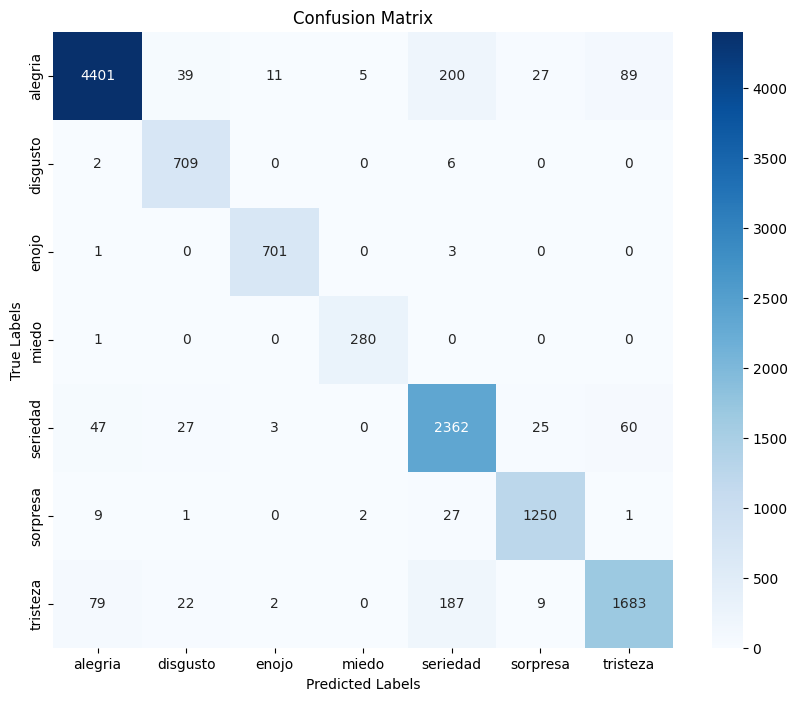

In [19]:
eval_model(EmotionCNNBuilder(7), root_directory)

Epoch 1, Loss: 1.7846071698392432
Epoch 2, Loss: 1.3481838158331811
Epoch 3, Loss: 1.0668674963526428
Epoch 4, Loss: 0.8726779233353833
Epoch 5, Loss: 0.7181159233053526
Epoch 6, Loss: 0.6107174612504119
Epoch 7, Loss: 0.5166741547485193
Epoch 8, Loss: 0.4415518283494748
Epoch 9, Loss: 0.37953223375370726
Epoch 10, Loss: 0.3576841834001243
              precision    recall  f1-score   support

     alegria       0.97      0.88      0.92      4772
    disgusto       0.74      0.99      0.85       717
       enojo       0.91      0.99      0.95       705
       miedo       0.92      1.00      0.96       281
    seriedad       0.84      0.85      0.85      2524
    sorpresa       0.91      0.97      0.94      1290
    tristeza       0.85      0.86      0.85      1982

    accuracy                           0.89     12271
   macro avg       0.88      0.93      0.90     12271
weighted avg       0.90      0.89      0.89     12271



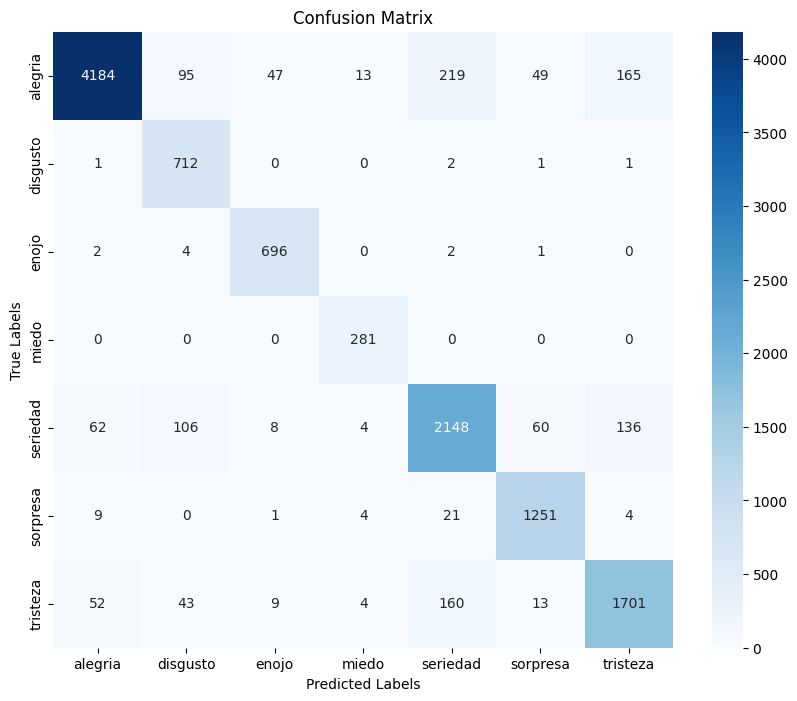

In [11]:
# Example usage
root_directory = './dataset_emociones'
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageDataset(root_directory, transform, split='train')
test_dataset = ImageDataset(root_directory, transform, split='train') #for test, change to test.

num_classes = len(os.listdir(os.path.join(root_directory, 'train')))
cnn_builder = EmotionCNNBuilder(num_classes)

classifier = NnClassifier(cnn_builder)
classifier.fit(train_dataset)

predictions = classifier.predict(test_dataset)

emotion_labels = os.listdir(os.path.join(root_directory, 'train'))
true_labels = test_dataset.labels
print(classification_report(true_labels, predictions, target_names=emotion_labels))

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
torch.cuda.empty_cache()

In [6]:

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_channels1x1, out_channels3x3reduce, out_channels3x3, out_channels5x5reduce, out_channels5x5, out_channels_pool):
        super(InceptionModule, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, out_channels1x1, kernel_size=1)
        self.branch3x3 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels3x3reduce, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels3x3reduce, out_channels3x3, kernel_size=3, padding=1)
        )
        self.branch5x5 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels5x5reduce, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels5x5reduce, out_channels5x5, kernel_size=5, padding=2)
        )
        self.branch_pool = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_channels_pool, kernel_size=1)
        )

    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        branch3x3 = self.branch3x3(x)
        branch5x5 = self.branch5x5(x)
        branch_pool = self.branch_pool(x)
        outputs = [branch1x1, branch3x3, branch5x5, branch_pool]
        return torch.cat(outputs, 1)

class ConfigurableCNNBuilder(nn.Module, BaseEstimator):
    def __init__(self, architecture_string, num_classes):
        super(ConfigurableCNNBuilder, self).__init__()
        self.architecture_string = architecture_string
        self.num_classes = num_classes

    def build(self):
        new_instance = ConfigurableCNNBuilder(self.architecture_string, self.num_classes)
        new_instance.build_layers()
        return new_instance

    def build_layers(self):
        layers = []
        in_channels = 3
        pool_count = 0
        conv_output_shape = (3, 100, 100) #initial input shape.
        flatten_layer_added = False #track if flatten layer was added.
        for i, layer_type in enumerate(self.architecture_string):
            if layer_type == 'C':
                out_channels = 64 * (2 ** pool_count)
                layers.append((f'conv_{i}', nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)))
                layers.append((f'relu_{i}', nn.ReLU(inplace=True)))
                in_channels = out_channels
                conv_output_shape = (out_channels, conv_output_shape[1], conv_output_shape[2]) #update output shape
            elif layer_type == 'P':
                layers.append((f'pool_{i}', nn.MaxPool2d(kernel_size=2, stride=2)))
                pool_count += 1
                conv_output_shape = (conv_output_shape[0], conv_output_shape[1] // 2, conv_output_shape[2] // 2) #update output shape
            elif layer_type == 'I':
                layers.append((f'inception_{i}', InceptionModule(in_channels, 64, 96, 128, 16, 32, 32)))
                in_channels = 256
                conv_output_shape = (in_channels, conv_output_shape[1], conv_output_shape[2]) #update output shape
            elif layer_type == 'N':
                layers.append((f'norm_{i}', nn.LayerNorm(conv_output_shape)))
            elif layer_type == 'F':
                if not flatten_layer_added: #flatten before first fully connected.
                    layers.append(('flatten', nn.Flatten()))
                    flatten_layer_added = True
                if i == self.architecture_string.rfind('F'): #Last F layer.
                    layers.append((f'fc_{i}', nn.Linear(torch.prod(torch.tensor(conv_output_shape)), self.num_classes)))
                else:
                    layers.append((f'fc_{i}', nn.Linear(torch.prod(torch.tensor(conv_output_shape)), 512)))
                    layers.append((f'relu_fc_{i}', nn.ReLU(inplace=True)))
                    layers.append((f'dropout_fc_{i}', nn.Dropout()))
                    conv_output_shape = (512,) #update output shape
        self.net = nn.Sequential(OrderedDict(layers))

    def forward(self, x):
        return self.net(x)

No weights file found. Training model...
shape (64, 100, 100)
dim 640000
dim2 98
dim2 50.0
shape (64, 50, 50)
dim 160000
shape (128, 50, 50)
dim 320000
dim2 48.0
dim2 25.0
shape (128, 25, 25)
dim 80000
shape (128, 25, 25)
dim 80000


shape (512,)
dim 512


Epoch 1, Loss: 1.5914367653119068


Epoch 2, Loss: 1.1877585252126057


Epoch 3, Loss: 1.0509736281819642


Epoch 4, Loss: 0.9025233815579364


Epoch 5, Loss: 0.7979126204736531


Epoch 6, Loss: 0.7204831802907089


Epoch 7, Loss: 0.6428965147739897


Epoch 8, Loss: 0.5526980986663451


Epoch 9, Loss: 0.5026372414237509


Epoch 10, Loss: 0.4489398327811311


Model weights saved to CPCPFF.pth


              precision    recall  f1-score   support

     alegria       0.96      0.85      0.90      4772
    disgusto       0.82      0.99      0.90       717
       enojo       0.85      0.99      0.91       705
       miedo       0.90      1.00      0.95       281
    seriedad       0.83      0.75      0.79      2524
    sorpresa       0.87      0.93      0.90      1290
    tristeza       0.72      0.88      0.79      1982

    accuracy                           0.86     12271
   macro avg       0.85      0.91      0.88     12271
weighted avg       0.87      0.86      0.86     12271



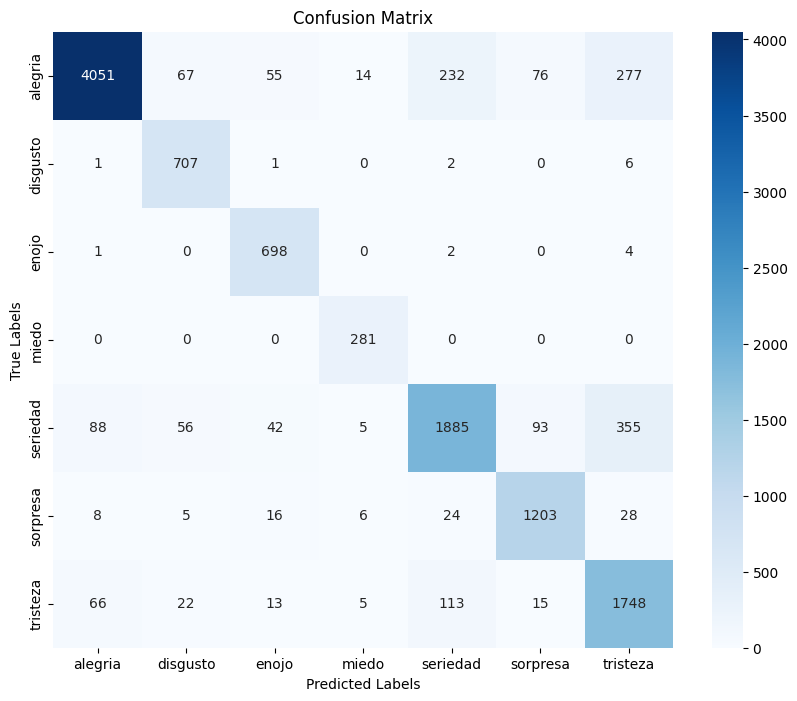

In [29]:
root_directory = './dataset_emociones'
num_classes = len(os.listdir(os.path.join(root_directory, 'train')))
model = ConfigurableCNNBuilder("CPCPFF",num_classes)
eval_model(model, root_directory, save_path="CPCPFF.pth")
# eval_model(model, root_directory, save_path=None)

No weights file found. Training model...
shape (64, 100, 100)
dim 640000
dim2 98
dim2 50.0
shape (64, 50, 50)
dim 160000
shape (128, 50, 50)
dim 320000
dim2 48.0
dim2 25.0
shape (128, 25, 25)
dim 80000
shape (256, 25, 25)
dim 160000
dim2 23.0
dim2 12.5
shape (256, 12, 12)
dim 36864
shape (256, 12, 12)
dim 36864
shape (512,)
dim 512


Epoch 1, Loss: 1.6629190516347687


Epoch 2, Loss: 1.0359393166533362


Epoch 3, Loss: 0.773815738192449


Epoch 4, Loss: 0.5916816541381801


Epoch 5, Loss: 0.46996435977052897


Epoch 6, Loss: 0.3835226307855919


Epoch 7, Loss: 0.3191868550396369


Epoch 8, Loss: 0.2830253251789448


Epoch 9, Loss: 0.23992972031313306


Epoch 10, Loss: 0.2112128730659606
Model weights saved to CPCPCPFF.pth


              precision    recall  f1-score   support

     alegria       0.98      0.96      0.97      4772
    disgusto       0.98      0.99      0.99       717
       enojo       0.98      1.00      0.99       705
       miedo       0.99      1.00      0.99       281
    seriedad       0.93      0.95      0.94      2524
    sorpresa       0.97      0.99      0.98      1290
    tristeza       0.94      0.94      0.94      1982

    accuracy                           0.96     12271
   macro avg       0.97      0.98      0.97     12271
weighted avg       0.96      0.96      0.96     12271



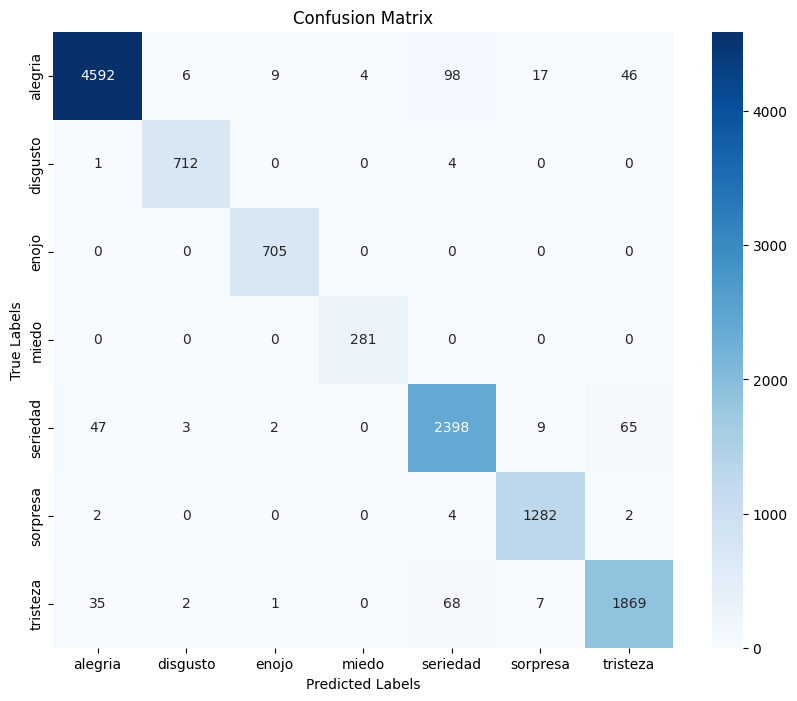

In [30]:
root_directory = './dataset_emociones'
num_classes = len(os.listdir(os.path.join(root_directory, 'train')))
model = ConfigurableCNNBuilder("CPCPCPFF",num_classes)
eval_model(model, root_directory, save_path="CPCPCPFF.pth")

shape (64, 100, 100)
dim 640000
dim2 98
dim2 50.0
shape (64, 50, 50)
dim 160000
shape (128, 50, 50)
dim 320000
dim2 48.0
dim2 25.0
shape (128, 25, 25)
dim 80000
shape (256, 25, 25)
dim 160000
dim2 23.0
dim2 12.5
shape (256, 12, 12)
dim 36864
shape (512, 12, 12)
dim 73728
dim2 10.5
shape (512, 12, 12)
dim 73728
shape (512,)
dim 512
Epoch 1, Loss: 1.8777320021763444
Epoch 2, Loss: 1.269817154078434
Epoch 3, Loss: 0.9333252077922225
Epoch 4, Loss: 0.7501351233416548
Epoch 5, Loss: 0.613163381194075
Epoch 6, Loss: 0.5180339678190649
Epoch 7, Loss: 0.4285955857485533
Epoch 8, Loss: 0.37914886880510795
Epoch 9, Loss: 0.35622254077073495
Epoch 10, Loss: 0.3068615011773848
              precision    recall  f1-score   support

     alegria       0.97      0.89      0.92      4772
    disgusto       0.85      0.97      0.91       717
       enojo       0.88      1.00      0.94       705
       miedo       0.91      1.00      0.95       281
    seriedad       0.87      0.87      0.87      2524
 

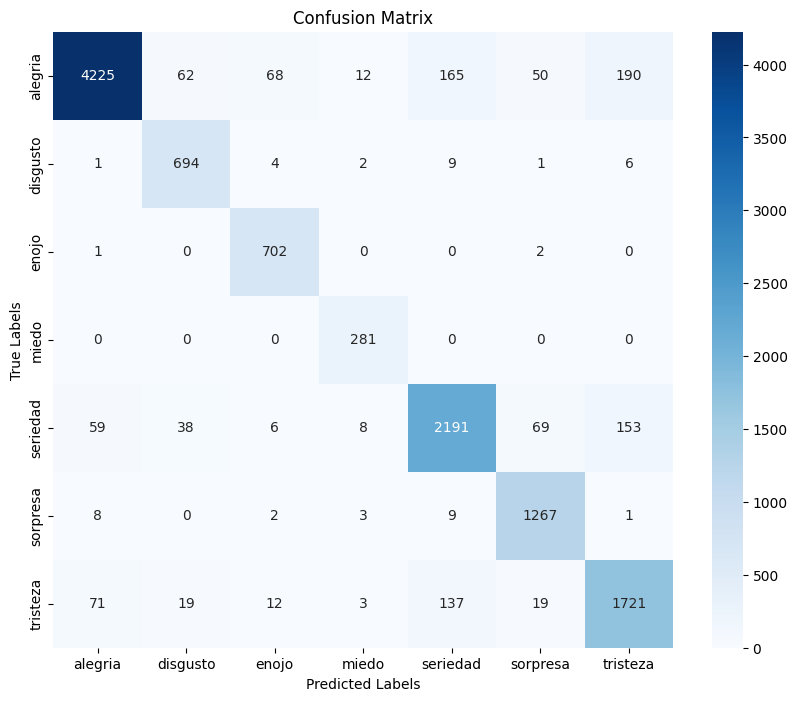

In [22]:
root_directory = './dataset_emociones'
num_classes = len(os.listdir(os.path.join(root_directory, 'train')))
model = ConfigurableCNNBuilder("CPNCPNCPCFF",num_classes)
eval_model(model, root_directory, "CPNCPNCPCFF")

In [31]:
torch.cuda.empty_cache()

dim2 51.0
shape (3, 50, 50)
dim 7500
shape (128, 50, 50)
dim 320000
dim2 49.0
shape (128, 50, 50)
dim 320000
dim2 47.0
dim2 24.5
shape (128, 25, 25)
dim 80000
shape (256, 25, 25)
dim 160000
dim2 22.5
shape (256, 25, 25)
dim 160000
dim2 20.5
dim2 11.25
shape (256, 12, 12)
dim 36864
shape (512, 12, 12)
dim 73728
dim2 9.25
shape (512, 12, 12)
dim 73728
shape (512,)
dim 512
shape (512,)
dim 512
Epoch 1, Loss: 1.8984102134903271
Epoch 2, Loss: 1.4078593904462953
Epoch 3, Loss: 1.017796610404427
Epoch 4, Loss: 0.7573547294208159
Epoch 5, Loss: 0.5829500464800125
Epoch 6, Loss: 0.46376250870525837
Epoch 7, Loss: 0.3864413666500089
Epoch 8, Loss: 0.35838630914804526
Epoch 9, Loss: 0.30113328734296374
Epoch 10, Loss: 0.26201063258728635
              precision    recall  f1-score   support

     alegria       0.99      0.90      0.94      4772
    disgusto       0.91      0.99      0.95       717
       enojo       0.94      1.00      0.97       705
       miedo       0.97      1.00      0.99  

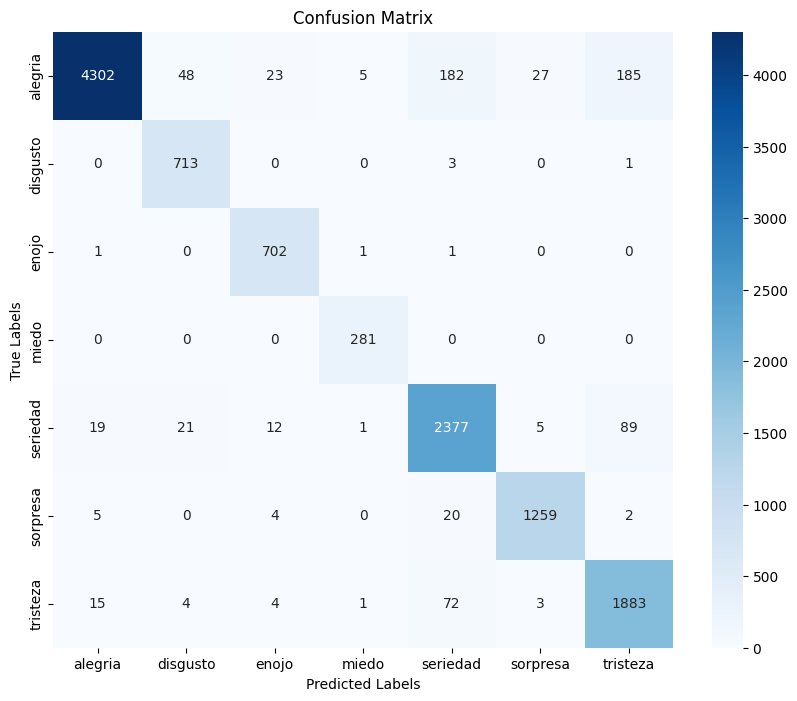

In [23]:
root_directory = './dataset_emociones'
num_classes = len(os.listdir(os.path.join(root_directory, 'train')))
model = ConfigurableCNNBuilder("PCCPCCPCFFF",num_classes)
eval_model(model, root_directory)



In [2]:
classifier.model

NameError: name 'classifier' is not defined